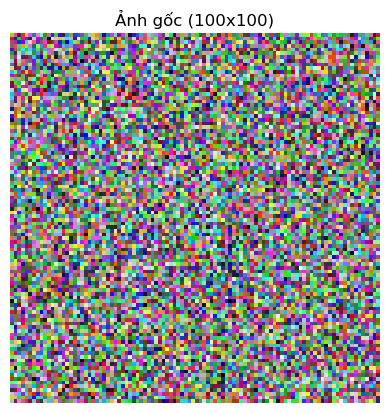

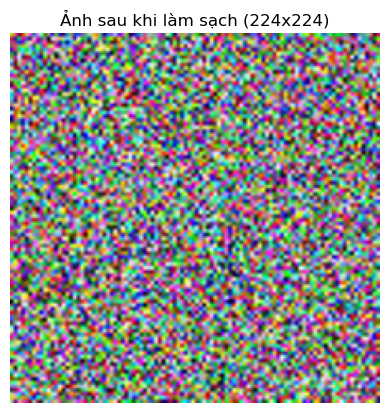

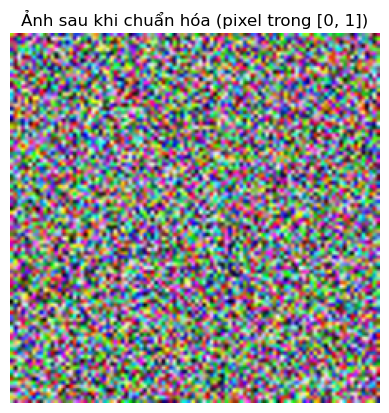

Giá trị pixel của ảnh gốc (chỉ là 1 pixel): [150. 243.   0.]
Giá trị pixel của ảnh sau chuẩn hóa (chỉ là 1 pixel): [0.5882353 0.9529412 0.       ]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Bước 1: Sinh dữ liệu ảnh ngẫu nhiên (Ảnh gốc có kích thước nhỏ hơn 224x224)
def generate_random_image(height=100, width=100, channels=3):
    """
    Tạo một ảnh ngẫu nhiên với các giá trị pixel từ 0 đến 255
    :param height: Chiều cao của ảnh
    :param width: Chiều rộng của ảnh
    :param channels: Số kênh màu (ví dụ: 3 cho RGB)
    :return: Mảng numpy đại diện cho ảnh
    """
    random_image = np.random.randint(0, 256, (height, width, channels), dtype=np.uint8)
    return random_image

# Sinh một ảnh ngẫu nhiên với kích thước 100x100 và 3 kênh màu (RGB)
random_img = generate_random_image()

# Hiển thị ảnh ngẫu nhiên gốc (Kích thước 100x100)
plt.imshow(random_img)
plt.axis('off')
plt.title("Ảnh gốc (100x100)")
plt.show()

# Bước 2: Làm sạch dữ liệu ảnh (Resize ảnh về 224x224)
def clean_image(img, target_size=(224, 224)):
    """
    Làm sạch ảnh: Đảm bảo kích thước ảnh đồng nhất với target_size
    :param img: Ảnh đầu vào (dạng numpy array)
    :param target_size: Kích thước mục tiêu để resize ảnh
    :return: Ảnh đã được resize về kích thước chuẩn
    """
    img = image.array_to_img(img)  # Chuyển numpy array thành ảnh PIL
    img = img.resize(target_size)  # Resize ảnh về kích thước mục tiêu
    img = image.img_to_array(img)  # Chuyển ảnh PIL thành numpy array
    return img

# Làm sạch ảnh ngẫu nhiên (resize về 224x224)
cleaned_img = clean_image(random_img)

# Hiển thị ảnh sau khi làm sạch (đã resize về 224x224)
plt.imshow(cleaned_img.astype('uint8'))
plt.axis('off')
plt.title("Ảnh sau khi làm sạch (224x224)")
plt.show()

# Bước 3: Chuẩn hóa dữ liệu ảnh (Chuyển giá trị pixel về khoảng [0, 1])
def normalize_image(img):
    """
    Chuẩn hóa dữ liệu ảnh, chuyển giá trị pixel về khoảng [0, 1]
    :param img: Ảnh đầu vào (dạng numpy array)
    :return: Ảnh đã chuẩn hóa
    """
    img_normalized = img / 255.0  # Chia mỗi pixel cho 255 để giá trị nằm trong [0, 1]
    return img_normalized

# Chuẩn hóa ảnh sau khi làm sạch
normalized_img = normalize_image(cleaned_img)

# Hiển thị ảnh đã chuẩn hóa (Ảnh gốc và ảnh chuẩn hóa không thay đổi hình dạng, chỉ thay đổi giá trị pixel)
plt.imshow(normalized_img)
plt.axis('off')
plt.title("Ảnh sau khi chuẩn hóa (pixel trong [0, 1])")
plt.show()

# Kiểm tra giá trị pixel của ảnh trước và sau chuẩn hóa
print(f"Giá trị pixel của ảnh gốc (chỉ là 1 pixel): {cleaned_img[0, 0]}")
print(f"Giá trị pixel của ảnh sau chuẩn hóa (chỉ là 1 pixel): {normalized_img[0, 0]}")


In [1]:
# Bước 4: Xây dựng mô hình CNN đơn giản
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_simple_cnn(input_shape=(224, 224, 3), num_classes=10):
    """
    Tạo mô hình Convolutional Neural Network (CNN) đơn giản
    :param input_shape: Kích thước đầu vào của ảnh
    :param num_classes: Số lượng lớp phân loại
    :return: Mô hình CNN đã được biên dịch
    """
    model = Sequential([
        # Lớp convolution đầu tiên
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        
        # Lớp convolution thứ hai
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        # Lớp convolution thứ ba
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        # Flatten layer để chuyển đổi tensor 3D sang 1D
        Flatten(),
        
        # Lớp fully connected
        Dense(64, activation='relu'),
        Dropout(0.5),  # Để giảm overfitting
        
        # Lớp output
        Dense(num_classes, activation='softmax')
    ])
    
    # Biên dịch mô hình
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Tạo mô hình CNN
model = create_simple_cnn()

# Hiển thị thông tin về mô hình
model.summary()

# Lưu ý: Để huấn luyện mô hình, bạn sẽ cần:
# 1. Dữ liệu huấn luyện (X_train, y_train)
# 2. Dữ liệu kiểm tra (X_test, y_test)
# 3. Chuyển đổi nhãn sang dạng one-hot encoding
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,825,930 (10.78 MB)

 Trainable params: 2,825,930 (10.78 MB)

 Non-trainable params: 0 (0.00 B)

Kích thước X_train: (5000, 224, 224, 3)
Kích thước y_train: (5000, 10)
Kích thước X_test: (1000, 224, 224, 3)
Kích thước y_test: (1000, 10)
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.0936 - loss: 2.3028 - val_accuracy: 0.0820 - val_loss: 2.3034
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.1048 - loss: 2.3026 - val_accuracy: 0.0820 - val_loss: 2.3032
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.0972 - loss: 2.3028 - val_accuracy: 0.1120 - val_loss: 2.3031
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.1046 - loss: 2.3024 - val_accuracy: 0.1120 - val_loss: 2.3032
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.1095 - loss: 2.3022 - val_accuracy: 0.1120 - val_loss: 2.3029
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.1018 - loss: 2.3021 - val_accuracy: 0.1120 - val_loss: 2.3029
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.1064 - loss: 2.3026

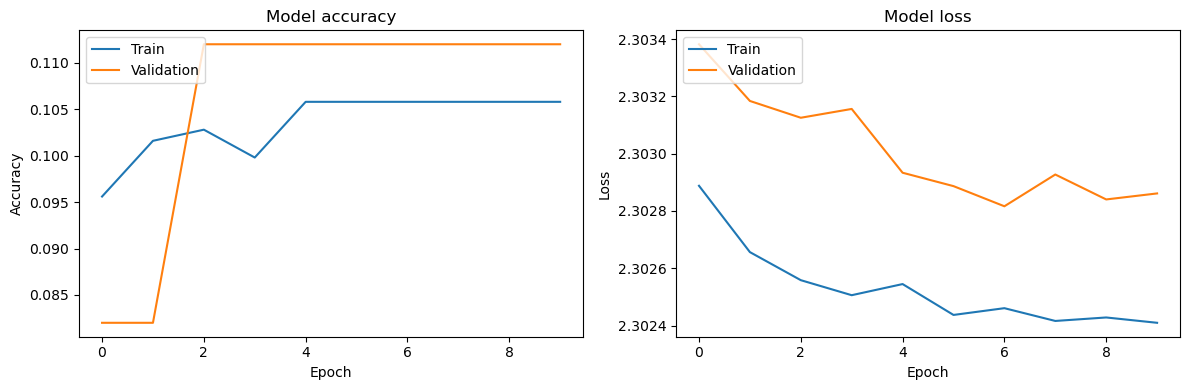

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - accuracy: 0.1126 - loss: 2.3028
Test accuracy: 11.20%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

# Mở rộng hàm generate_random_image để tạo nhiều ảnh với nhãn
def generate_training_data(num_samples=1000, height=224, width=224, channels=3, num_classes=10):
    """
    Sinh dữ liệu huấn luyện ngẫu nhiên
    :param num_samples: Số lượng ảnh muốn sinh
    :param height: Chiều cao ảnh
    :param width: Chiều rộng ảnh
    :param channels: Số kênh màu
    :param num_classes: Số lượng lớp phân loại
    :return: X_train (ảnh), y_train (nhãn)
    """
    # Sinh ảnh ngẫu nhiên
    X_train = np.random.randint(0, 256, (num_samples, height, width, channels), dtype=np.uint8)
    
    # Sinh nhãn ngẫu nhiên
    y_train = np.random.randint(0, num_classes, num_samples)
    
    # Chuẩn hóa ảnh
    X_train_normalized = X_train.astype('float32') / 255.0
    
    # Chuyển nhãn sang one-hot encoding
    y_train_onehot = to_categorical(y_train, num_classes=num_classes)
    
    return X_train_normalized, y_train_onehot

# Tạo dữ liệu huấn luyện
X_train, y_train = generate_training_data(num_samples=5000, num_classes=10)

# Tạo dữ liệu kiểm tra
X_test, y_test = generate_training_data(num_samples=1000, num_classes=10)

# Kiểm tra kích thước dữ liệu
print("Kích thước X_train:", X_train.shape)
print("Kích thước y_train:", y_train.shape)
print("Kích thước X_test:", X_test.shape)
print("Kích thước y_test:", y_test.shape)

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)

# Vẽ đồ thị loss và accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")